In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
 

In [3]:

data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")

# Convert from string "Yes"/"No" to binary

feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]

X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [5]:
pip install eli5

  Using cached MarkupSafe-2.1.1-cp39-cp39-win_amd64.whl (17 kB)
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=4767453780f81a48f36bd92aece27f14ed2c560d32f2dfb1c7f937f91b3772b3
  Stored in directory: c:\users\sanjeev boora\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires Jinja2<3.0.0, but you have jinja2 3.1.2 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.1 which is incompatible.


In [6]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


### Interpreting Permutation Importances<br>
The values towards the top are the most important features, and those towards the bottom matter least.<br>
In our example, the most important feature was Goals scored. That seems sensible. Soccer fans may have some intuition about whether the orderings of other variables are surprising or not.

#### Partial Dependence Plots

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
y = (data['Man of the Match'] == "Yes") 
# Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

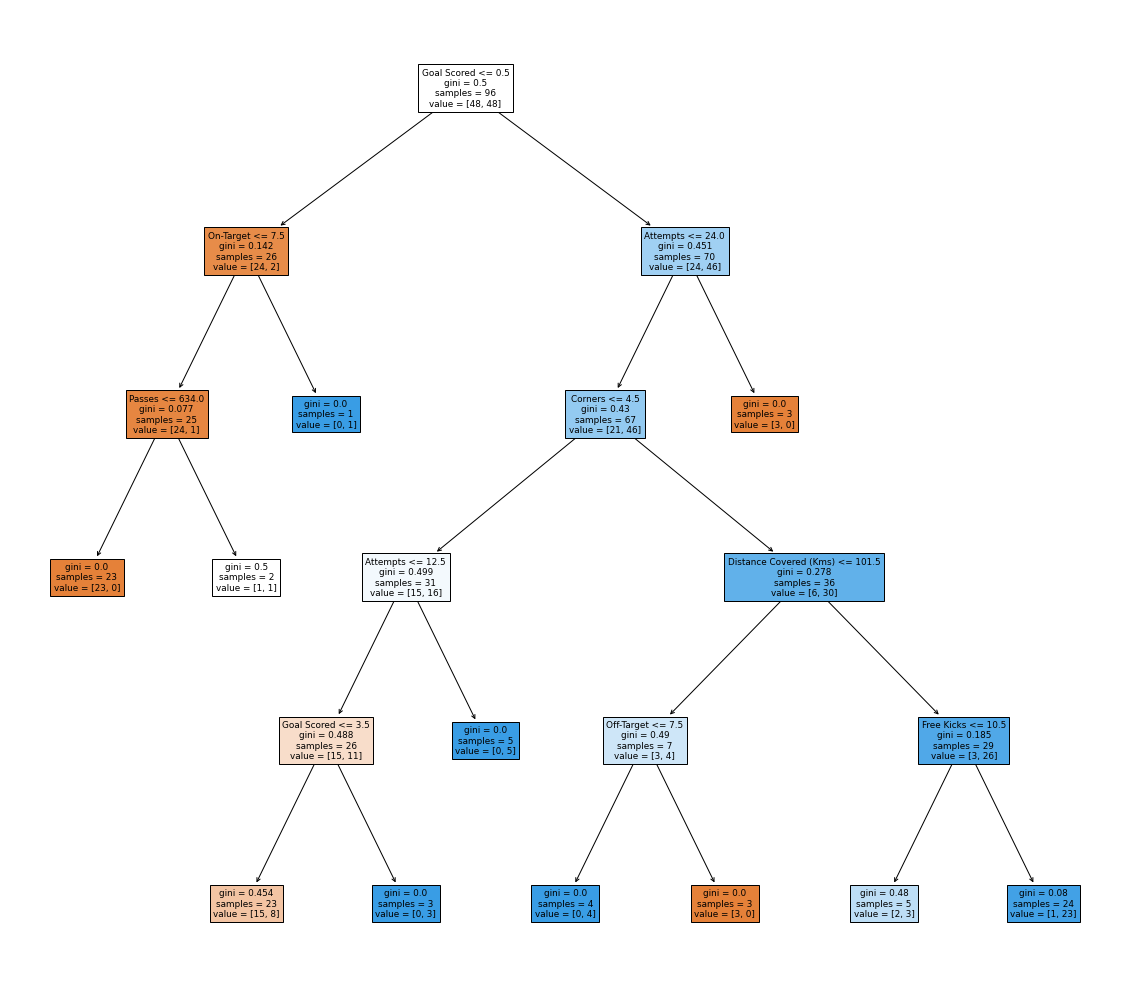

In [14]:
 
plt.figure(figsize=(20,18))
plot_tree(tree_model,feature_names=feature_names,filled=True)
plt.show()
 

In [17]:
pip install PDPbox

  Using cached PDPbox-0.2.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'



  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Sanjeev boora\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Sanjeev boora\\AppData\\Local\\Temp\\pip-install-2uvd30te\\matplotlib_5e841630abaa4f6f9e4cff55e3240e28\\setup.py'"'"'; __file__='"'"'C:\\Users\\Sanjeev boora\\AppData\\Local\\Temp\\pip-install-2uvd30te\\matplotlib_5e841630abaa4f6f9e4cff55e3240e28\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Sanjeev boora\AppData\Local\Temp\pip-wheel-c2cfb4nw'
       cwd: C:\Users\Sanjeev boora\AppData\Local\Temp\pip-install-2uvd30te\matplotlib_5e841630abaa4f6f9e4cff55e3240e28\
  Complete output (499 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPL

  copying lib\matplotlib\tri\triinterpolate.py -> build\lib.win-amd64-3.9\matplotlib\tri
  copying lib\matplotlib\tri\tripcolor.py -> build\lib.win-amd64-3.9\matplotlib\tri
  copying lib\matplotlib\tri\triplot.py -> build\lib.win-amd64-3.9\matplotlib\tri
  copying lib\matplotlib\tri\trirefine.py -> build\lib.win-amd64-3.9\matplotlib\tri
  copying lib\matplotlib\tri\tritools.py -> build\lib.win-amd64-3.9\matplotlib\tri
  copying lib\matplotlib\tri\__init__.py -> build\lib.win-amd64-3.9\matplotlib\tri
  creating build\lib.win-amd64-3.9\matplotlib\backends\qt_editor
  copying lib\matplotlib\backends\qt_editor\figureoptions.py -> build\lib.win-amd64-3.9\matplotlib\backends\qt_editor
  copying lib\matplotlib\backends\qt_editor\formlayout.py -> build\lib.win-amd64-3.9\matplotlib\backends\qt_editor
  copying lib\matplotlib\backends\qt_editor\formsubplottool.py -> build\lib.win-amd64-3.9\matplotlib\backends\qt_editor
  copying lib\matplotlib\backends\qt_editor\_formlayout.py -> build\lib.win-a

### Calculate SHAP Values

### SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature.

In [23]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

C:\Users\Sanjeev boora\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.29, 0.71]])

In [24]:
pip install Shap 

Note: you may need to restart the kernel to use updated packages.


In [25]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [26]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

####  We will look at SHAP values for a single row of the dataset (we arbitrarily chose row 5). For context, we'll look at the raw predictions before looking at the SHAP values

#### If you look carefully at the code where we created the SHAP values, you'll notice we reference Trees in shap.TreeExplainer(my_model). But the SHAP package has explainers for every type of model.

shap.DeepExplainer works with Deep Learning models.<br>
shap.KernelExplainer works with all models, though it is slower than other Explainers and it offers an approximation rather than exact Shap values.<br>
Here is an example using KernelExplainer to get similar results. The results aren't identical because KernelExplainer gives an approximate result. But the results tell the same story

In [27]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.

### Shap Summary Plot

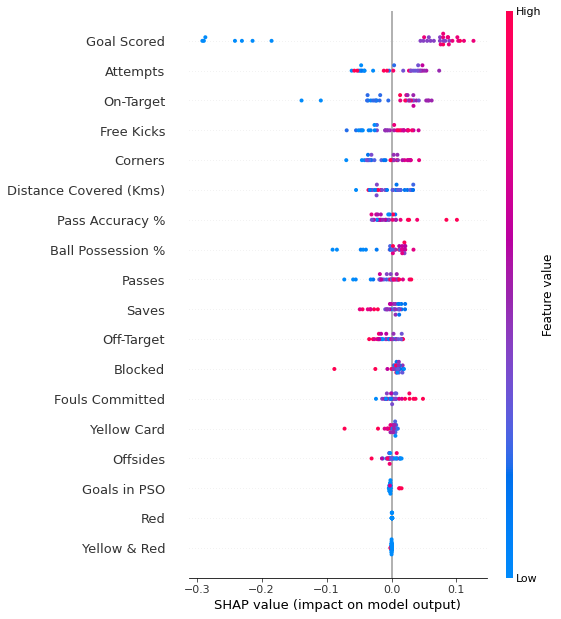

In [28]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)